### Task about glasses and floors

Two identical glasses and a building ten floors high are given. You should to determine the minimum number of times the glasses are thrown from a floor to find the floor where the glasses start to break, or to determine that the glasses do not break when dropped from any floor.

Find the minimum number of times if:

- 2 glasses and a 10 floors high building are given

- 2 glasses and a 100 floors high building are given

- 3 glasses and a 100 floors high building are given

- 3 glasses and a 1000 floors high building are given

- 5 glasses and a 1000 floors high building are given

In [ ]:
from functools import lru_cache

@lru_cache(None)
def min_drops(glasses, floors):
    if floors == 0 or floors == 1:
        return floors
    if glasses == 1:
        return floors

    min_attempts = float('inf')
    low, high = 1, floors
    while low <= high:
        mid = (low + high) // 2
        break_case = min_drops(glasses - 1, mid - 1) 
        no_break_case = min_drops(glasses, floors - mid)
        worst_case = 1 + max(break_case, no_break_case)

        if break_case > no_break_case:
            high = mid - 1
        else:
            low = mid + 1

        min_attempts = min(min_attempts, worst_case)

    return min_attempts

# Test the function on provided cases
results = {
    "2 glasses, 10 floors": min_drops(2, 10),
    "2 glasses, 100 floors": min_drops(2, 100),
    "3 glasses, 100 floors": min_drops(3, 100),
    "3 glasses, 1000 floors": min_drops(3, 1000),
    "5 glasses, 1000 floors": min_drops(5, 1000)
}

results

{'2 glasses, 10 floors': 4,
 '2 glasses, 100 floors': 14,
 '3 glasses, 100 floors': 9,
 '3 glasses, 1000 floors': 19,
 '5 glasses, 1000 floors': 11}

🧮 Алгоритм (пояснення)

Якщо 0 або 1 поверх — все очевидно.

Якщо тільки 1 склянка — доведеться кидати по одному поверху знизу вгору.

Для кожного поверху mid (середина між low і high) ми рахуємо два варіанти:

Склянка розбилась ⇒ менше склянок, менші поверхи (шукаємо внизу).

Склянка не розбилась ⇒ ті ж склянки, але вищі поверхи (шукаємо вгорі).

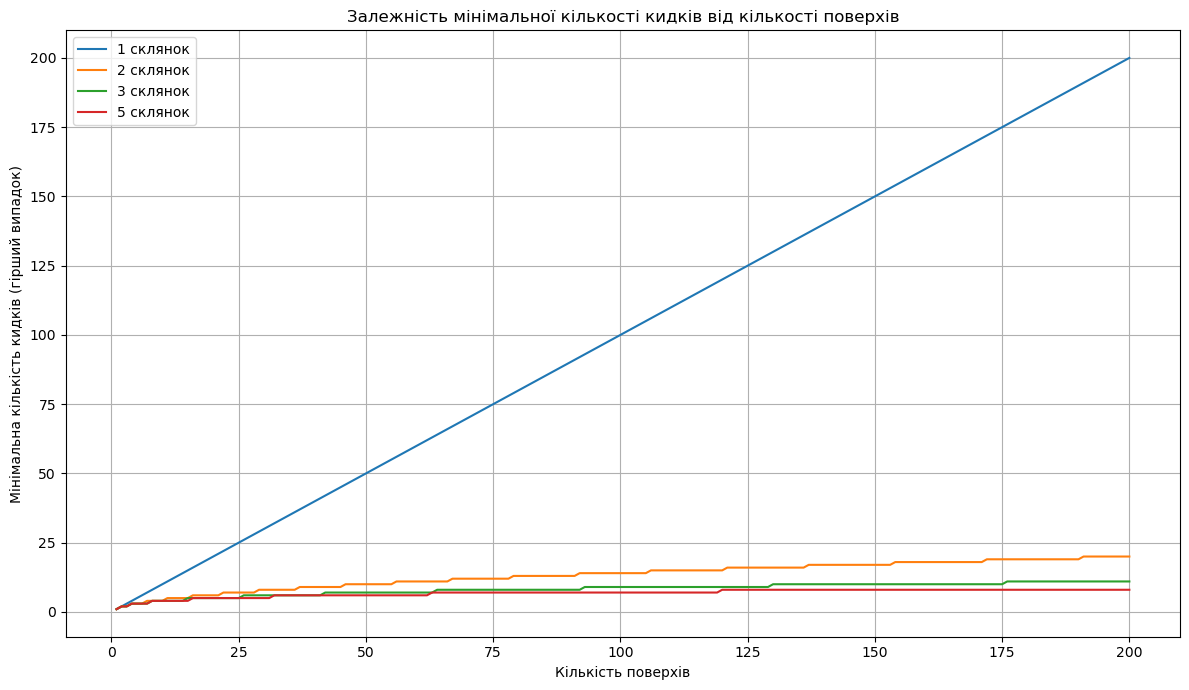

In [6]:
import matplotlib.pyplot as plt
# 📊 Побудова графіка: від 1 до 200 поверхів
max_floors = 200
glass_counts = [1, 2, 3, 5]  # кількість склянок

# Словник для результатів: {кількість склянок: [мін. кількість спроб для кожного поверху]}
results = {g: [] for g in glass_counts}
x = list(range(1, max_floors + 1))

# 🧮 Розраховуємо кількість спроб для кожного випадку
for g in glass_counts:
    for f in x:
        results[g].append(min_drops(g, f))

# 📈 Візуалізація
plt.figure(figsize=(12, 7))
for g in glass_counts:
    plt.plot(x, results[g], label=f'{g} склянок')
plt.title("Залежність мінімальної кількості кидків від кількості поверхів")
plt.xlabel("Кількість поверхів")
plt.ylabel("Мінімальна кількість кидків (гірший випадок)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

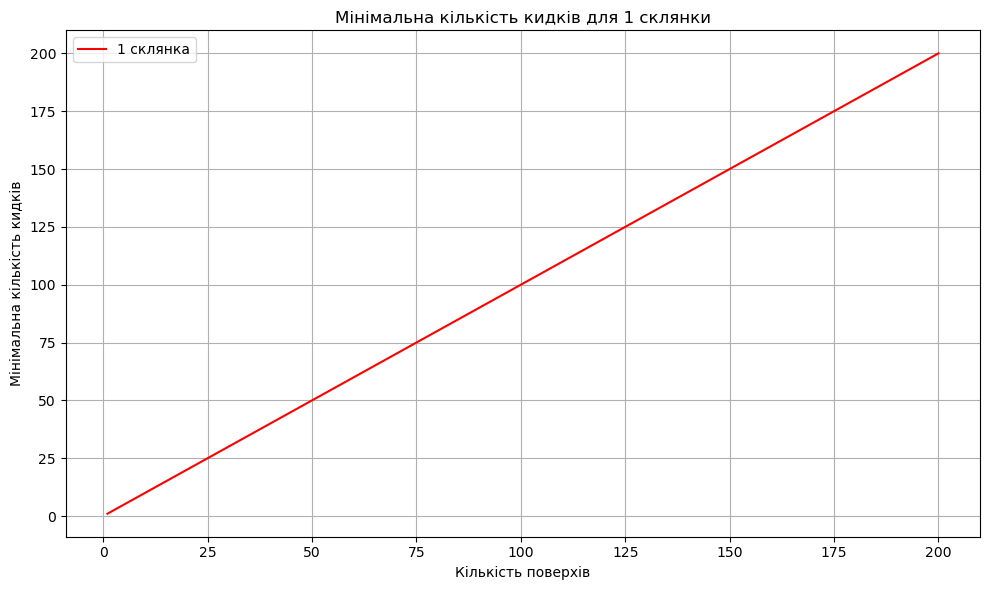

In [10]:
import matplotlib.pyplot as plt

# Для 1 склянки (лінійна стратегія)
max_floors = 200
x = list(range(1, max_floors + 1))
y_1glass = x  # при 1 склянці потрібно перевіряти кожен поверх

plt.figure(figsize=(10, 6))
plt.plot(x, y_1glass, label="1 склянка", color="red")
plt.title("Мінімальна кількість кидків для 1 склянки")
plt.xlabel("Кількість поверхів")
plt.ylabel("Мінімальна кількість кидків")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

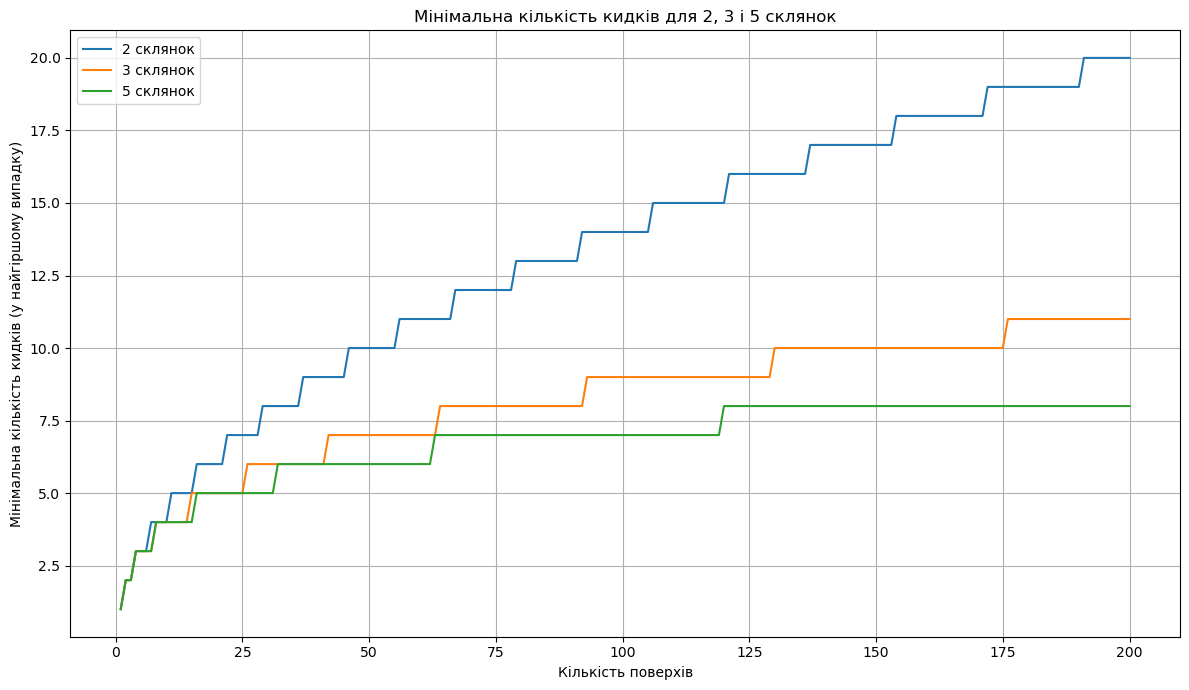

In [ ]:
# Результати для інших кількостей склянок

glass_counts = [2, 3, 5]
results = {g: [] for g in glass_counts}
x = list(range(1, max_floors + 1))

for g in glass_counts:
    for f in x:
        results[g].append(min_drops(g, f))

# Візуалізація
plt.figure(figsize=(12, 7))
for g in glass_counts:
    plt.plot(x, results[g], label=f'{g} склянок')
plt.title("Мінімальна кількість кидків для 2, 3 і 5 склянок")
plt.xlabel("Кількість поверхів")
plt.ylabel("Мінімальна кількість кидків (у найгіршому випадку)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

🔍 Опис графіку:

На графіку ви бачите, як змінюється мінімальна кількість кидків у гіршому випадку, коли ми збільшуємо кількість поверхів (до 200), при різній кількості склянок:

1 склянка (синя лінія): лінійна залежність — доведеться перевіряти кожен поверх знизу вгору.

2 склянки (помаранчева): значно менше кидків, ніж при 1 склянці.

3 та 5 склянок: з кожним додатковим склом ми можемо використовувати розумнішу стратегію — обирати поверхи "розумно", щоб мінімізувати найгірший сценарій.

📌 Висновки

- Чим більше у нас склянок — тим менше спроб потрібно.

- Якщо 1 склянка — доведеться пробувати знизу догори.

- Використання динамічного програмування зменшує час розв'язання.

- Бінарний пошук дозволяє швидко знайти оптимальну "точку" для спроби.